In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

In [ ]:
## distribution of each numeric colum

In [3]:
houses.columns

Index(['median_house_value', 'median_income', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude',
       'longitude'],
      dtype='object')

### plotting utility

In [8]:
## plotting utility

import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import RobustScaler
import numpy as np
from math import ceil

##
## type= {boxplot, kdeplot}
##
def plot_distributions(data, columns, type='boxplot', title=None):

    print("plotting columns {c}".format(c=list(columns)))
    
    if type not in {'boxplot', 'dkeplot'}:
        print("type= {boxplot, dkeplot} only are supported")
        return

    ## grid size depends on number of columns
    ## max 4 columns in the grid
    maxCols  = 4
    
    if len(columns) < 4:
        numCols = len(columns)
    else:
        numCols = maxCols
    numRows = ceil(len(columns) / 4)
    
    print("grid is {0}x{1}".format(numRows, numCols))

    fig, axs = plt.subplots(numRows, numCols)
    fig.suptitle(title)
    fig.set_figwidth(5*numCols)
    fig.set_figheight(3*numCols)
    fig.tight_layout(pad=5.0)

    print(axs)

#         handle special axes
    if numRows == 1 and numCols == 1:
        c = columns[0]
        # axes is a scalar
        if type == 'boxplot':
            sns.boxplot(data=data, x=c, ax=axs)
        else:
            sns.kdeplot(data=data, x=c, ax=axs)
        axs.set_title(c)

    elif numRows == 1:
        i = 0
        # axes is a 1D array
        for c in columns:
#         print("column {c}".format(c=c))
            if type == 'boxplot':
                sns.boxplot(data=data, x=c, ax=axs[i])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i])
            axs[i].set_title(c)
            i = i+1
        
    else:
    # general case of a 2D grid    
        i=j=0    
        for c in columns:
            print("column {c}".format(c=c))
            if type == 'boxplot':
                print("plotting on axes [{0},{1}]".format(i,j))
                sns.boxplot(data=data, x=c, ax=axs[i,j])
            else:
                sns.kdeplot(data=data, x=c, ax=axs[i,j])

            axs[i,j].set_title(c)
            j = j+1
            if j == 4:
                i = i+1
                j= 0


### Descriptive analytics: start by looking at raw statistics for the features in this dataset. what sort of story are they telling?

feel free to use the plot utility defined above

plotting columns ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column median_house_value
plotting on axes [0,0]
column median_income
plotting on axes [0,1]
column housing_median_age
plotting on axes [0,2]
column total_rooms
plotting on axes [0,3]
column total_bedrooms
plotting on axes [1,0]
column population
plotting on axes [1,1]
column households
plotting on axes [1,2]
column latitude
plotting on axes [1,3]
column longitude
plotting on axes [2,0]


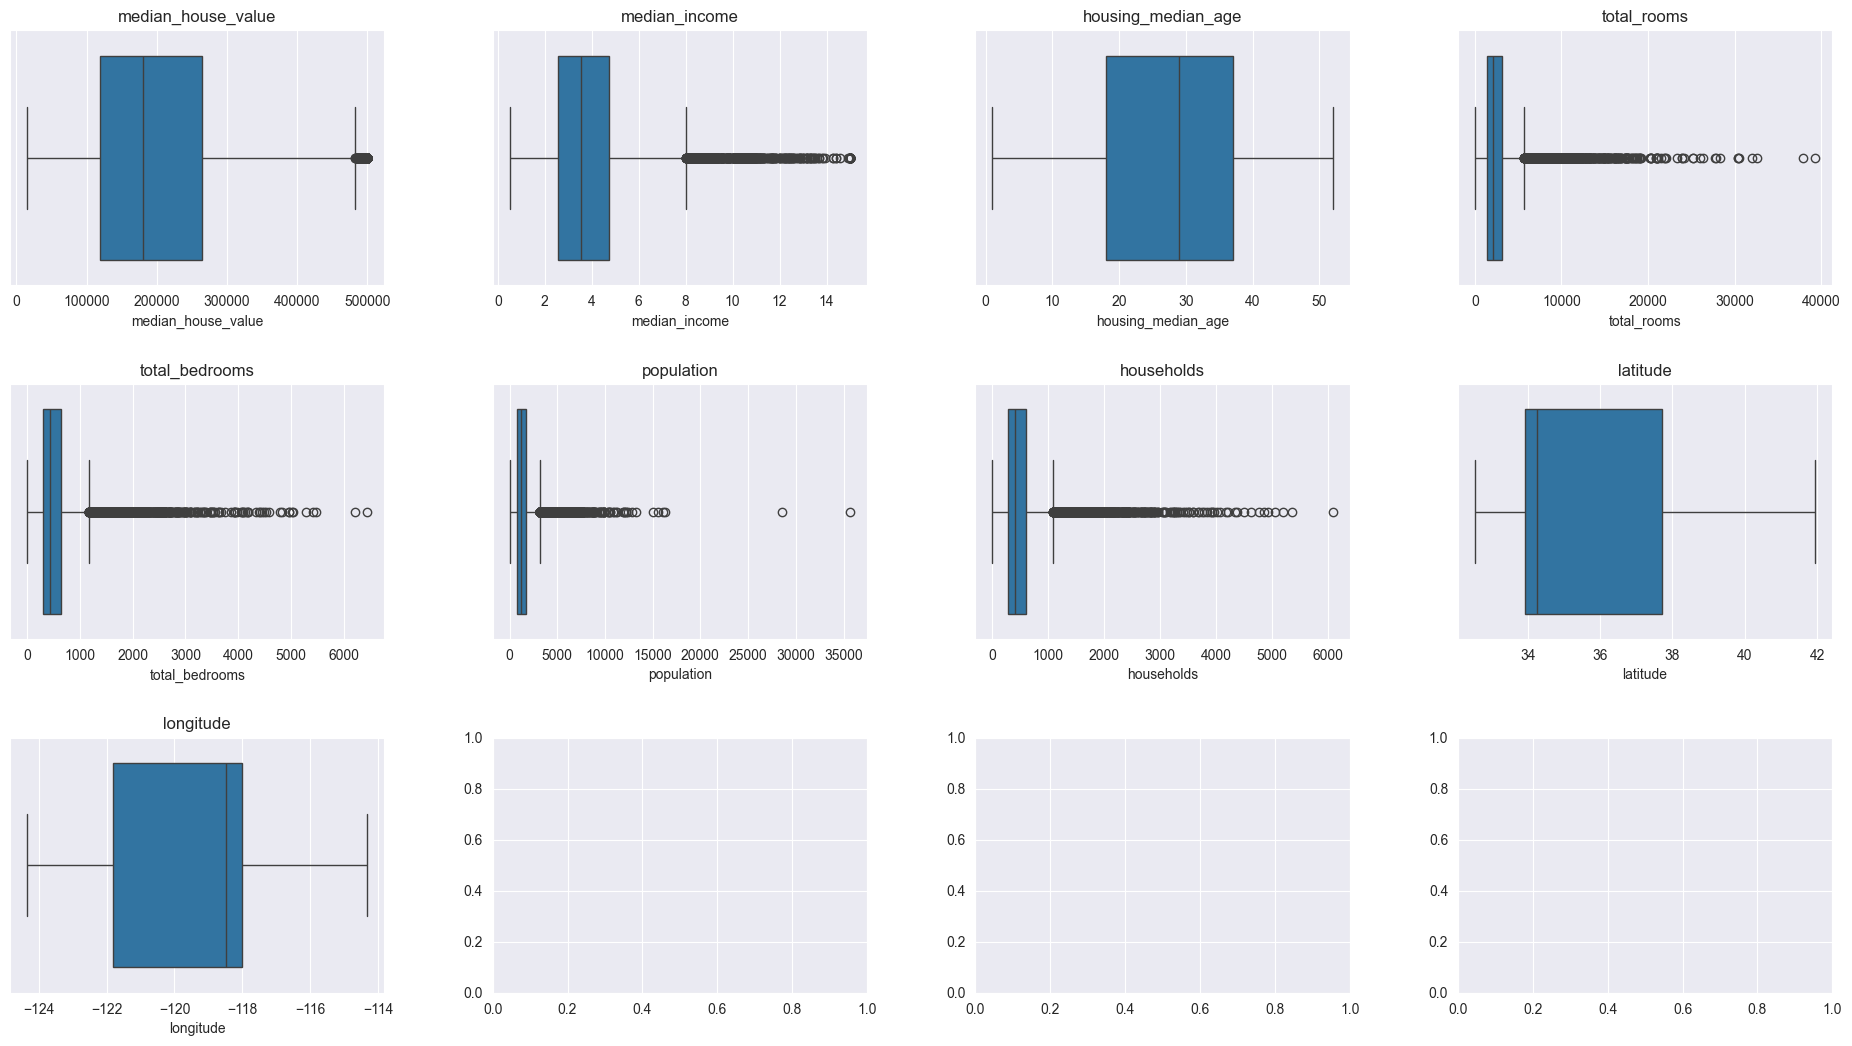

In [10]:
## your code here
plot_distributions(houses,houses.columns)

### feature normalisation 

Some of the features need to be normalised before any conclusion can be drawn

plotting columns ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column median_house_value
plotting on axes [0,0]
column median_income
plotting on axes [0,1]
column housing_median_age
plotting on axes [0,2]
column total_rooms
plotting on axes [0,3]
column total_bedrooms
plotting on axes [1,0]
column population
plotting on axes [1,1]
column households
plotting on axes [1,2]
column latitude
plotting on axes [1,3]
column longitude
plotting on axes [2,0]


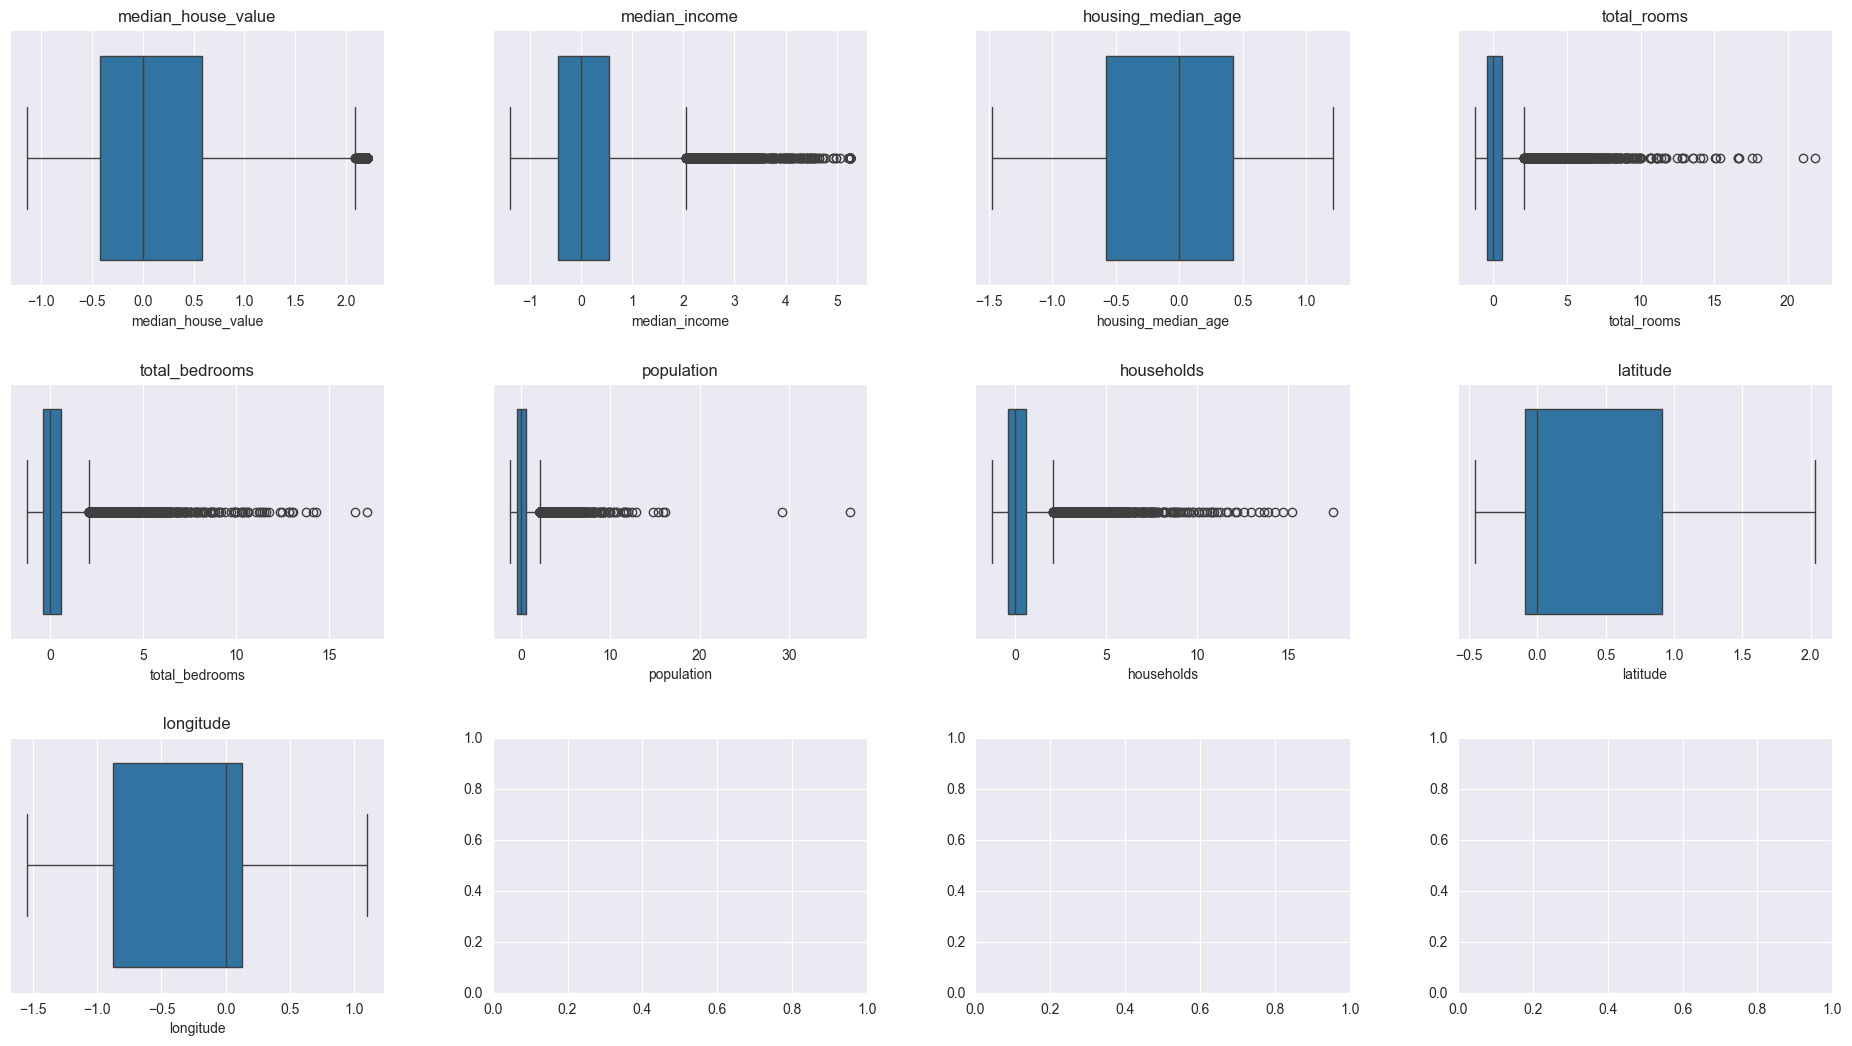

In [14]:
## normalising the features -- your code here
robust_scaler = RobustScaler()

houses_robust_scaled = robust_scaler.fit_transform(houses)

houses_robust_scaled = pd.DataFrame(houses_robust_scaled, columns=houses.columns)

plot_distributions(houses_robust_scaled, houses_robust_scaled.columns)



### record identification

based on analysis of the normalised features, try and pinpoint specific records that may be outliers, and explain why

In [86]:
## your code here
percentage_sum = 0;
for column in houses_robust_scaled:
    # using z score calculation (z = (value - mean) / standard deviation)
    z = (houses_robust_scaled[column] - houses_robust_scaled[column].mean()) / houses_robust_scaled[column].std()
    # This is the number of standard deviations we can adjust this in order to see where the increase begins to slow
    threshold = 2.55
    # Z.abs is used to ensure that negative std is calculated the same as positive
    percentage_within_threshold = ((z.abs() <= threshold).sum() / len(z)) * 100
    print(f'for {column}, {percentage_within_threshold}% of values fall within {threshold} standard deviations')
    percentage_sum += percentage_within_threshold
print(f'average:{percentage_sum / len(houses_robust_scaled.columns)}')

for median_house_value, 100.0% of values fall within 2.55 standard deviations
for median_income, 97.75678294573643% of values fall within 2.55 standard deviations
for housing_median_age, 100.0% of values fall within 2.55 standard deviations
for total_rooms, 97.57751937984496% of values fall within 2.55 standard deviations
for total_bedrooms, 97.48546511627907% of values fall within 2.55 standard deviations
for population, 97.62596899224806% of values fall within 2.55 standard deviations
for households, 97.44186046511628% of values fall within 2.55 standard deviations
for latitude, 99.6608527131783% of values fall within 2.55 standard deviations
for longitude, 99.99515503875969% of values fall within 2.55 standard deviations
average:98.61595607235142


The change between 1std and 2std was a massive jump from and average of 70 to an average of 96. At 2.55, both of our median related columns reach 100% inclusion rate so this is where I stopped increasing the threshold. Removing using a threshold of 2.55 would mean removing around 1.4% of data.

In [92]:
def get_outlier_indexes(column, threshold):
    z_scores = (column - column.mean()) / column.std()
    return z_scores[abs(z_scores) > threshold].index

all_outlier_indexes = []
threshold = 2.55


for col in houses_robust_scaled.columns:
    new_vales = get_outlier_indexes(houses_robust_scaled[col], threshold)
    for value in new_vales:
        # Check for duplicates
        if value not in all_outlier_indexes:
            all_outlier_indexes.append(value)


# Display the list of all outlier indexes
print(len(all_outlier_indexes))


1288


plotting columns ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
grid is 3x4
[[<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: >]]
column median_house_value
plotting on axes [0,0]
column median_income
plotting on axes [0,1]
column housing_median_age
plotting on axes [0,2]
column total_rooms
plotting on axes [0,3]
column total_bedrooms
plotting on axes [1,0]
column population
plotting on axes [1,1]
column households
plotting on axes [1,2]
column latitude
plotting on axes [1,3]
column longitude
plotting on axes [2,0]


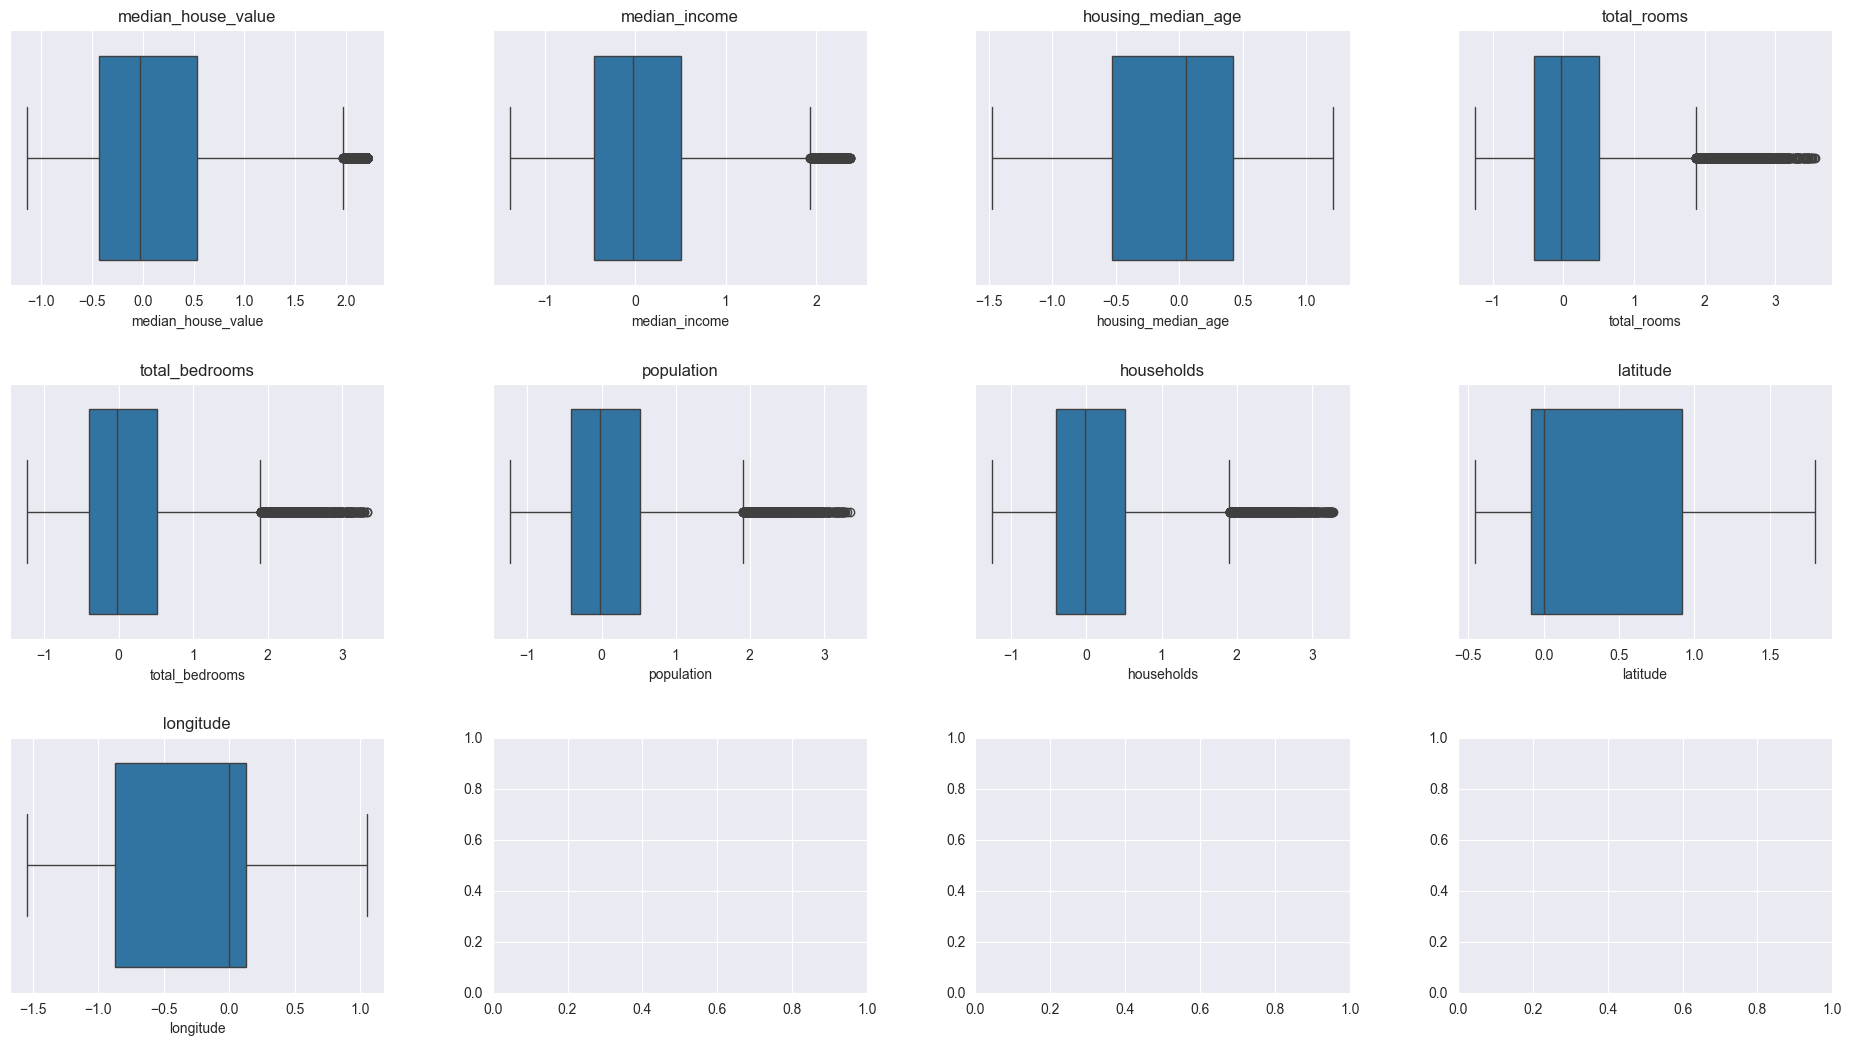

In [94]:
# Remove outliers
houses_normalised_clean = houses_robust_scaled.drop(all_outlier_indexes)
plot_distributions(houses_normalised_clean, houses_normalised_clean.columns)

have you completely solved the problem? how do we know for sure?

we may have removed too much (FP) or too little (FN). Can you suggest empirical validation of your findings?

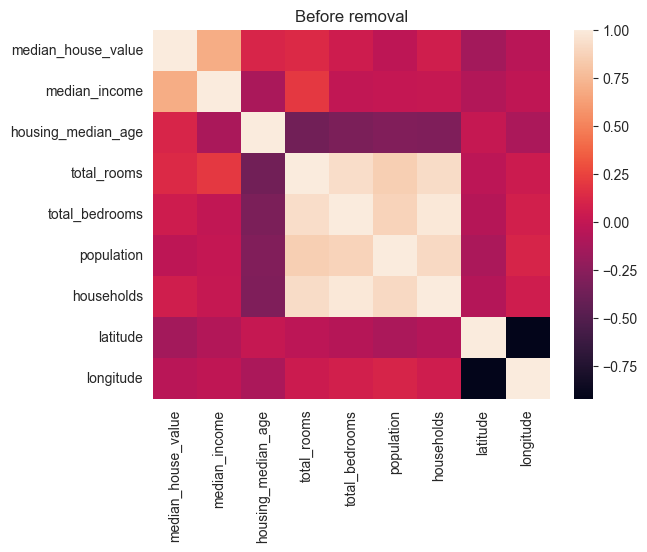

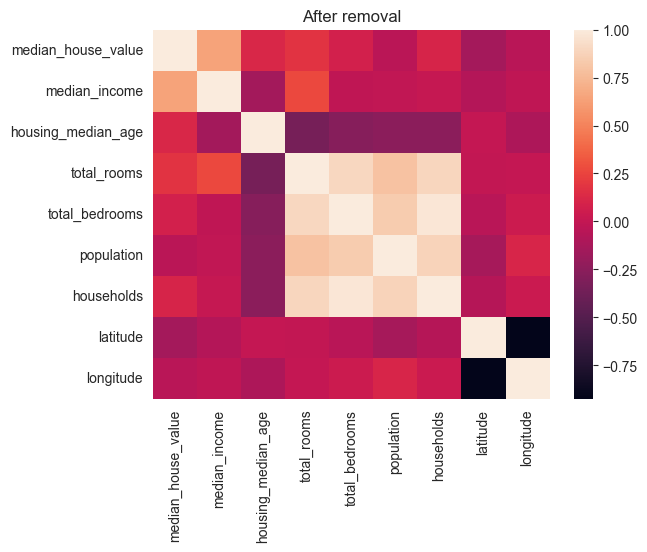

In [112]:
sns.heatmap(houses.corr())
plt.title('Before removal')
plt.show()
sns.heatmap(houses_normalised_clean.corr())
plt.title('After removal')
plt.show()

it appears that house value is not strongly correlated with size, so probably location is a more relevant factor

## next, try using LOF and / or KNN and see if the results align with your empirical analysis

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
## your code here

## Your overall conclusions here